<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/scripts/Cleaning_Covid_Death_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/COVID-19_Death_Counts.csv'
df = pd.read_csv(url)
df.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/03/2024,12/29/2019,01/04/2020,By Week,2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,10/03/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,10/03/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN
3,10/03/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN
4,10/03/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN


In [2]:
print(df.shape)
print(df.describe())

(16794, 17)
             Month     MMWR Week  COVID-19 Deaths  Total Deaths  \
count  3078.000000  13392.000000     1.377100e+04  1.679300e+04   
mean      6.263158     25.584677     7.030020e+02  7.400347e+03   
std       3.374995     14.747642     1.216949e+04  1.343265e+05   
min       1.000000      1.000000     0.000000e+00  1.200000e+01   
25%       3.000000     13.000000     2.300000e+01  4.900000e+02   
50%       6.000000     25.000000     5.700000e+01  1.082000e+03   
75%       9.000000     38.000000     1.800000e+02  2.255000e+03   
max      12.000000     53.000000     1.208368e+06  1.544822e+07   

       Percent of Expected Deaths  Pneumonia Deaths  \
count                16740.000000      1.566600e+04   
mean                   114.397133      6.973944e+02   
std                     18.320154      1.237954e+04   
min                      1.000000      0.000000e+00   
25%                    105.000000      4.100000e+01   
50%                    112.000000      8.400000e+01   

In [3]:
#Data initialy had two rows that were messing with the rest of the data set.
#Resolved this manually in the terminal and editing the file, and then reuploading it
#This line of code confirms that the column names are now correct
column_names = df.columns
print(column_names)

Index(['Data as of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week Ending Date', 'State', 'COVID-19 Deaths',
       'Total Deaths', 'Percent of Expected Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')


In [4]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [5]:
#Delete all rows in which the state variable is not named "United States"
df = df[df['State'] == 'United States']
df = df[df['Group'] == 'By Week']
df.tail()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
243,10/03/2024,08/25/2024,08/31/2024,By Week,2024,NaN,35.0,08/31/2024,United States,1288.0,53575.0,105.0,2983.0,467.0,32.0,3833.0,NaN
244,10/03/2024,09/01/2024,09/07/2024,By Week,2024,NaN,36.0,09/07/2024,United States,1123.0,51560.0,101.0,2968.0,445.0,26.0,3668.0,NaN
245,10/03/2024,09/08/2024,09/14/2024,By Week,2024,NaN,37.0,09/14/2024,United States,1063.0,47561.0,92.0,2636.0,421.0,22.0,3300.0,NaN
246,10/03/2024,09/15/2024,09/21/2024,By Week,2024,NaN,38.0,09/21/2024,United States,767.0,39186.0,76.0,2249.0,323.0,31.0,2723.0,NaN
247,10/03/2024,09/22/2024,09/28/2024,By Week,2024,NaN,39.0,09/28/2024,United States,447.0,23248.0,45.0,1303.0,178.0,17.0,1587.0,NaN


In [6]:
print(df.shape)
print(df.describe())

(248, 17)
       Month   MMWR Week  COVID-19 Deaths  Total Deaths  \
count    0.0  248.000000       248.000000    248.000000   
mean     NaN   25.584677      4872.451613  62392.661290   
std      NaN   14.776914      5727.352333   7854.101993   
min      NaN    1.000000         0.000000  23248.000000   
25%      NaN   13.000000      1240.250000  57963.000000   
50%      NaN   25.000000      2405.500000  59946.500000   
75%      NaN   38.000000      6417.500000  66023.500000   
max      NaN   53.000000     26028.000000  87415.000000   

       Percent of Expected Deaths  Pneumonia Deaths  \
count                  248.000000        248.000000   
mean                   114.447581       5470.383065   
std                     12.113384       3155.717917   
min                     45.000000       1303.000000   
25%                    107.000000       3526.000000   
50%                    111.000000       4088.500000   
75%                    119.000000       6144.000000   
max               

In [7]:
#Ensuring that there is only one unique value, United States, within the state variable. and one Unique Group variable
unique_states_count = df['State'].nunique()
print(unique_states_count)
print(df['Group'].unique())

1
['By Week']


In [8]:
#Taking out unnessary columns to make the data set smaller, and renaming MMWR Week to just Week for clarity
df.rename(columns={'MMWR Week': 'Week'}, inplace=True)
df = df[['Start Date', 'End Date', 'Year', 'Week', 'COVID-19 Deaths' ]]
df.head()

,Start Date,End Date,Year,Week,COVID-19 Deaths
0,12/29/2019,01/04/2020,2020,1.0,0.0
1,01/05/2020,01/11/2020,2020,2.0,1.0
2,01/12/2020,01/18/2020,2020,3.0,2.0
3,01/19/2020,01/25/2020,2020,4.0,3.0
4,01/26/2020,02/01/2020,2020,5.0,0.0


In [9]:
# How many missing values are in clean data for week variable?
df['Week'].isna().sum()

0

In [10]:
#vaccine data only goes to end of 2022, and so remove values that exceed that time frame
df = df[~df['Year'].isin(['2023', '2024'])]
df.tail()

,Start Date,End Date,Year,Week,COVID-19 Deaths
152,11/27/2022,12/03/2022,2022,48.0,2599.0
153,12/04/2022,12/10/2022,2022,49.0,3042.0
154,12/11/2022,12/17/2022,2022,50.0,3194.0
155,12/18/2022,12/24/2022,2022,51.0,3325.0
156,12/25/2022,12/31/2022,2022,52.0,3668.0


In [11]:
#Need to make 'Year' a float, which requires extracting a single year from values that have weeks between 2 years
non_numeric = df[~df['Year'].str.replace(',', '').str.isnumeric()]
print(non_numeric)

Empty DataFrame
Columns: [Start Date, End Date, Year, Week, COVID-19 Deaths]
Index: []


In [12]:
#Function to extract years appropriate. 0 and 52 should be categorized as the year 2020, and 104 to 2021
#def extract_year(row):
    # Split the 'Year' value at '/' and check the row's index
   # split_year = row['Year'].split('/')
    # If index is 0, get the first part of the split
   # if row.name == 0:
      #  return split_year[0]
    # Iif index is 52 or 104, get the second part of the split
   # elif row.name in [52, 104]:
        #return split_year[1]
    # Default behavior for other rows (if needed, or return original value)
   # return row['Year']
# Apply the function to the 'Year' column
#df['Year'] = df.apply(extract_year, axis=1)

In [23]:
print(df.shape)
df.head()

(157, 5)


,Start Date,End Date,Year,Week,COVID-19 Deaths
0,12/29/2019,01/04/2020,2020,1.0,0.0
1,01/05/2020,01/11/2020,2020,2.0,1.0
2,01/12/2020,01/18/2020,2020,3.0,2.0
3,01/19/2020,01/25/2020,2020,4.0,3.0
4,01/26/2020,02/01/2020,2020,5.0,0.0


In [13]:
df.to_csv('Covid_deaths_cleaned.csv', index=False)

EDA; making histograms for each years weekly Covid-19 deaths.

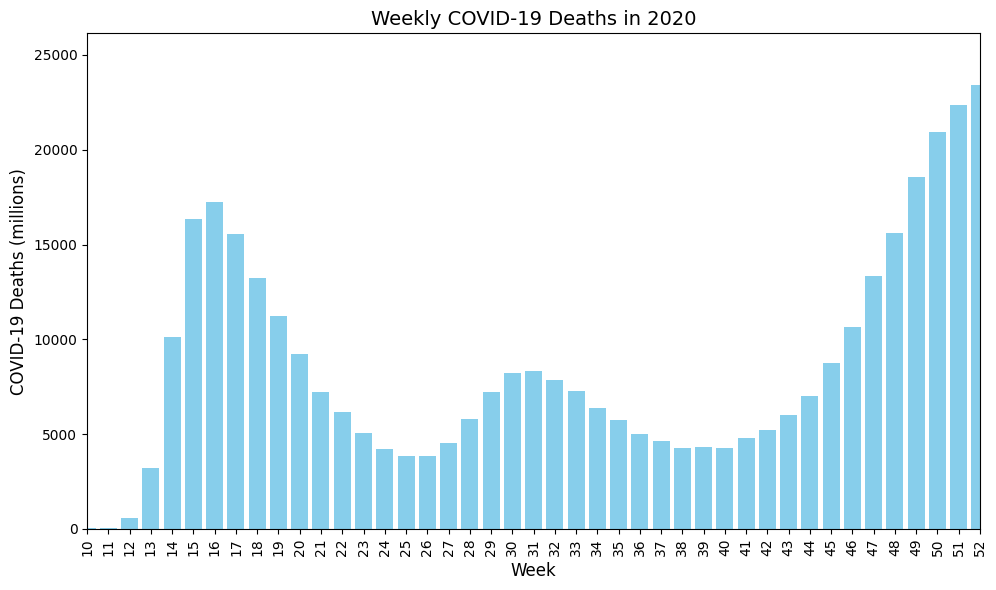

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the year 2020
df_2020 = df[(df['Year'] == '2020')]
weekly_deaths = df_2020.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='skyblue')
# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2020', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)
plt.tight_layout()
plt.xlim([10, 52])
plt.show()

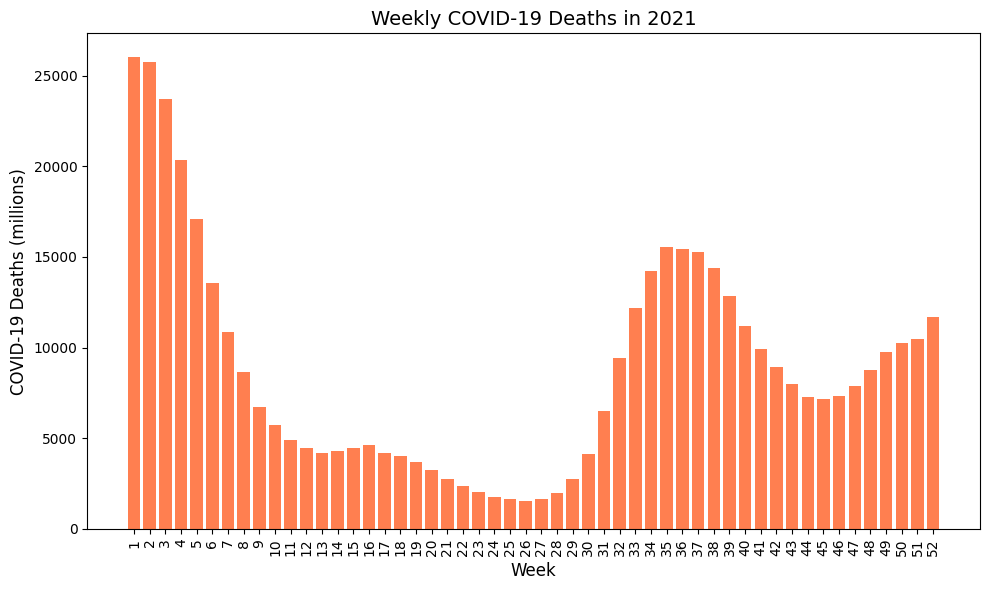

In [15]:
# Filter the data for the year 2021
df_2021 = df[(df['Year'] == '2021')]
weekly_deaths = df_2021.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='coral')
# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2021', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)
plt.tight_layout()
plt.show()

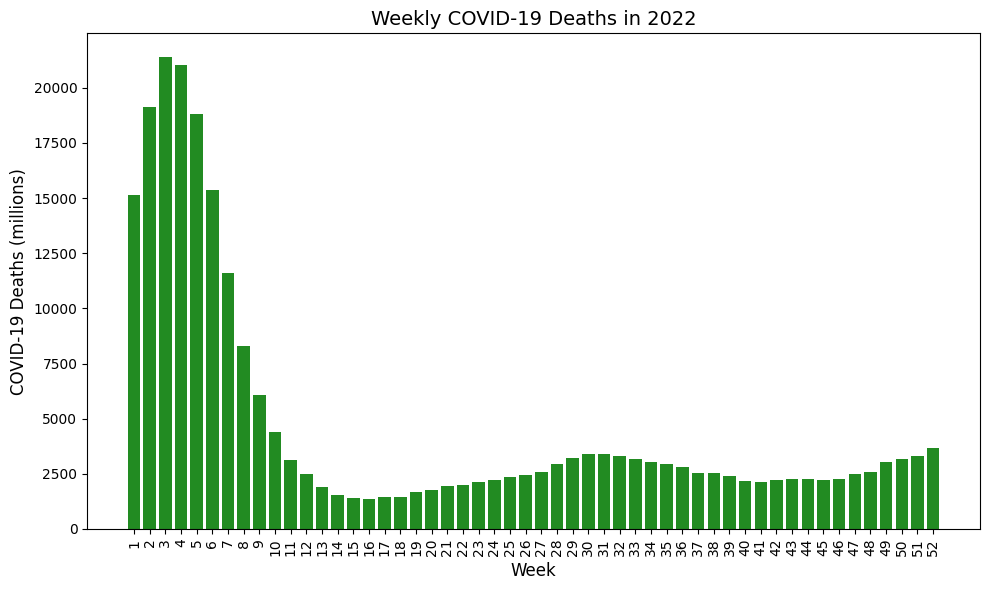

In [16]:
# Filter the data for the year 2022
df_2022 = df[(df['Year'] == '2022')]
weekly_deaths = df_2022.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='forestgreen')
# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2022', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)
# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

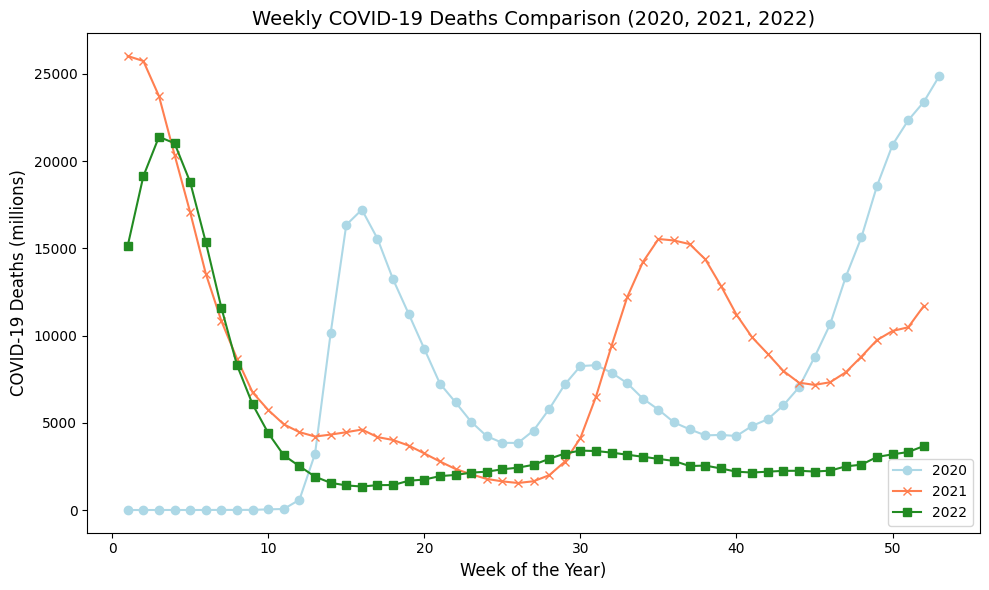

In [17]:
#line graph comparing weekly death rates accross three years; 2020, 2021, and 2022
import pandas as pd
import matplotlib.pyplot as plt

# Sort each DataFrame by 'Week' to ensure proper plotting
df_2020 = df_2020.sort_values('Week')
df_2021 = df_2021.sort_values('Week')
df_2022 = df_2022.sort_values('Week')

# Plotting the data for 2020, 2021, and 2022
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(df_2020['Week'], df_2020['COVID-19 Deaths'], label='2020', color='lightblue', linestyle='-', marker='o')

# Plot for 2021
plt.plot(df_2021['Week'], df_2021['COVID-19 Deaths'], label='2021', color='coral', linestyle='-', marker='x')

# Plot for 2022
plt.plot(df_2022['Week'], df_2022['COVID-19 Deaths'], label='2022', color='forestgreen', linestyle='-', marker='s')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths Comparison (2020, 2021, 2022)', fontsize=14)
plt.xlabel('Week of the Year)', fontsize=12)
plt.ylabel('COVID-19 Deaths (millions)', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the data for all three years
df_all = pd.concat([df_2020, df_2021, df_2022])
# Sort the combined DataFrame by 'Year' and 'Week'
df_all = df_all.sort_values(by=['Year', 'Week'])
df_all['Year']= df_all['Year'].astype(float)
# Create a continuous 'Week_Number' for plotting (52 weeks for each year)
# This ensures that weeks for 2021 and 2022 flow sequentially
df_all['Week_Number'] = df_all['Week'] + (df_all['Year'] - 2020) * 52

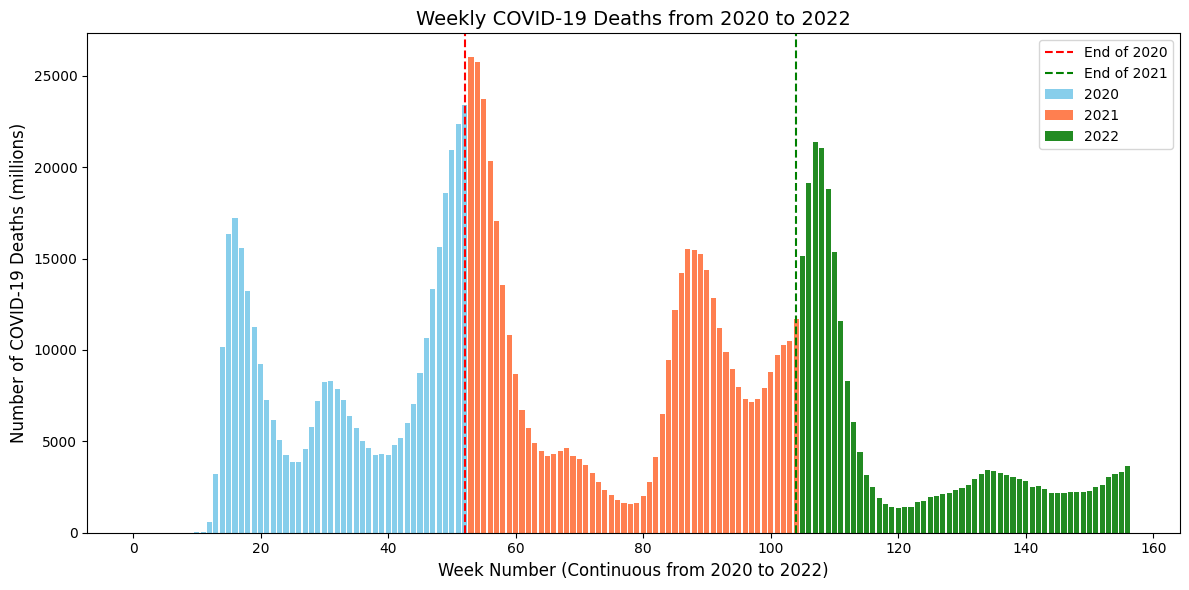

In [19]:
# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the data for 2020
plt.bar(df_all[df_all['Year'] == 2020]['Week_Number'],
        df_all[df_all['Year'] == 2020]['COVID-19 Deaths'],
        color='skyblue', label='2020')

# Plot the data for 2021
plt.bar(df_all[df_all['Year'] == 2021]['Week_Number'],
        df_all[df_all['Year'] == 2021]['COVID-19 Deaths'],
        color='coral', label='2021')

# Plot the data for 2022
plt.bar(df_all[df_all['Year'] == 2022]['Week_Number'],
        df_all[df_all['Year'] == 2022]['COVID-19 Deaths'],
        color='forestgreen', label='2022')

# Add vertical lines to indicate year changes
plt.axvline(x=52, color='red', linestyle='--', label='End of 2020')
plt.axvline(x=104, color='green', linestyle='--', label='End of 2021')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths from 2020 to 2022', fontsize=14)
plt.xlabel('Week Number (Continuous from 2020 to 2022)', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths (millions)', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

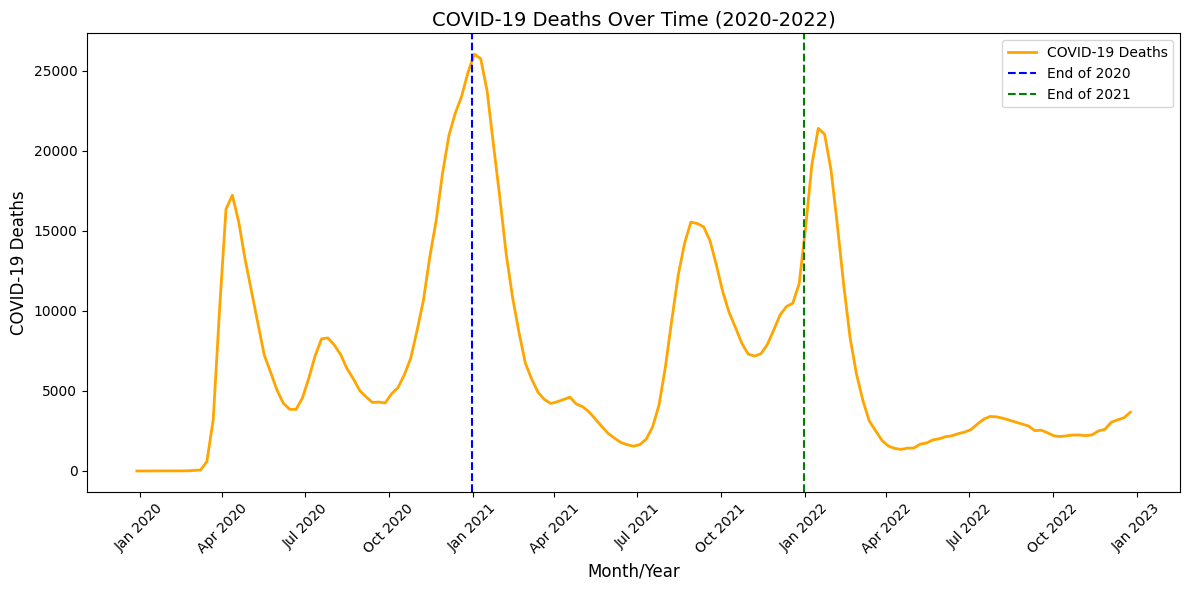

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Ensure the 'End_Date' column is in datetime format
df_all['Start Date'] = pd.to_datetime(df_all['Start Date'])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the COVID-19 deaths
plt.plot(df_all['Start Date'], df_all['COVID-19 Deaths'],
         color='orange', linewidth=2, label='COVID-19 Deaths')

# Add vertical lines to mark the end of each year
plt.axvline(x=pd.Timestamp('2020-12-31'), color='blue', linestyle='--', label='End of 2020')
plt.axvline(x=pd.Timestamp('2021-12-31'), color='green', linestyle='--', label='End of 2021')

# Set the x-axis to display every three months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add titles and labels
plt.title("COVID-19 Deaths Over Time (2020-2022)", fontsize=14)
plt.xlabel("Month/Year", fontsize=12)
plt.ylabel("COVID-19 Deaths", fontsize=12)

# Show the legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
